<a href="https://colab.research.google.com/github/RaghvendraM51147/icc-data-analysis/blob/main/Hotel_Booking_Analysis_Raghvendra_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

This project contains the real world data record of hotel bookings of a city and a resort hotel containing details like bookings, cancellations, guest details etc. Main aim of the project is to understand and visualize dataset from hotel and customer point of view i.e.

**reasons for booking cancellations across various parameters for
best time to book hotel,
peak season,and give suggestions to reduce these cancellations and increase revenue of hotels**

In [ ]:
# Importing all python libraries
import numpy as np
import pandas as pd 
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns


In [ ]:
# Mounting the Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading CSV file from
file_path = '/content/drive/MyDrive/Capstone Project/Hotel Bookings.csv'
df = pd.read_csv(file_path)

### Exploring of DataFrame of Hotel Booking Analysis

In [ ]:
# Show the DataFrame of Hotel booking 
df.shape

(119390, 32)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

## Creating a copy of original DataFrame


In [ ]:
hotel_df = df.copy()


## Removing the duplicate rows and cleaning the null value 

In [ ]:
# Removing the duplicate rows
print(hotel_df[hotel_df.duplicated()].shape)  #Show no of duplicate rows


(31994, 32)


In [ ]:
hotel_df.drop_duplicates(inplace=True)

In [ ]:
hotel_df.shape

(87396, 32)

In [ ]:
# Column having mising value 
hotel_df.isnull().sum().sort_values()

hotel                                  0
total_of_special_requests              0
required_car_parking_spaces            0
adr                                    0
customer_type                          0
days_in_waiting_list                   0
deposit_type                           0
booking_changes                        0
assigned_room_type                     0
reserved_room_type                     0
previous_bookings_not_canceled         0
previous_cancellations                 0
is_repeated_guest                      0
reservation_status                     0
distribution_channel                   0
reservation_status_date                0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_nights                   0
stays_in_weekend_nights                0
arrival_date_day_of_month              0
market_segment                         0
is_canceled                            0
arrival_date_wee

In [ ]:
hotel_df[['company','agent','country','children']]= hotel_df[['company','agent','country','children']].fillna(0) # Removing Null value

In [ ]:
# Checking After removing null value 
hotel_df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
# Converting datatype of columns 'children', 'company' and 'agent' from float to int.

hotel_df[['children', 'company', 'agent']] = hotel_df[['children', 'company', 'agent']].astype('int64')

# changing datatype of column 'reservation_status_date' to data_type.
hotel_df['reservation_status_date'] = pd.to_datetime(hotel_df['reservation_status_date'], format = '%Y-%m-%d')

# Hotel wise analysis


### number of bookings: city vs resort  - pie chart

In [ ]:
hotel_df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
# Represent hotel 
# Create the plot object
hotel_df.hotel.value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

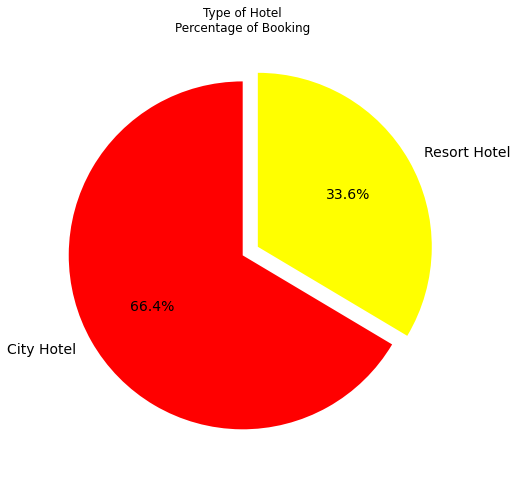

<Figure size 576x576 with 0 Axes>

In [ ]:
# number of bookings: city vs resort  - pie chart
plt.rcParams['figure.figsize'] = 8,8 # Enlarging the pie chart

# Indexing labels. tolist() will convert the index to list for easy manipulation
labels = hotel_df['hotel'].value_counts().index.tolist()

# Convert value counts to list
sizes = hotel_df['hotel'].value_counts().tolist()

# As the name suggest, explode will determine how much each section is separated from each other 
explode = (0, 0.1)

# Determine colour of pie chart
colors = ['red','yellow']
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.title("Type of Hotel" + "\nPercentage of Booking")
plt.show()
plt.savefig('Type_of_hotel.jpg')

## Checked-in and Cancled Booking

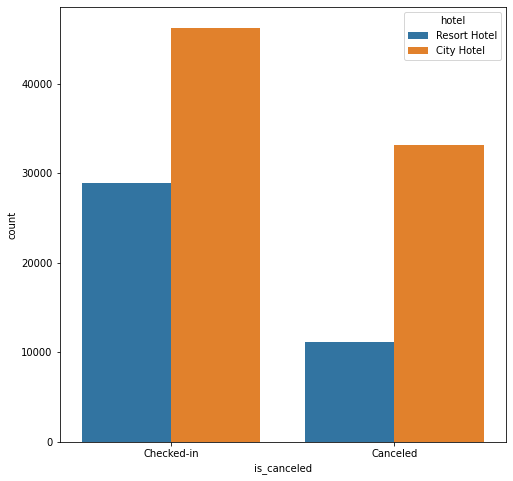

In [ ]:
# No of hotel Booking Checked-in and Canceled Represent in Bar graph 
hotel_df['is_canceled'] = hotel_df.is_canceled.replace([1,0], ['Canceled', 'Checked-in'])
canceled_data = hotel_df['is_canceled']
sns.countplot(data= hotel_df, x=canceled_data, hue='hotel')   
plt.show()                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

### Percentage of booking in each hotel

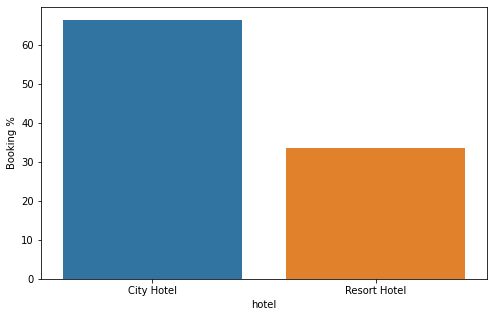

In [ ]:
#Q1) What is percentage of bookings in each hotel?
grouped_by_hotel = hotel_df.groupby('hotel')
data_per= pd.DataFrame((grouped_by_hotel.size()/hotel_df.shape[0])*100).reset_index().rename(columns = {0:'Booking %'})      #Calculating percentage
plt.figure(figsize = (8,5))
sns.barplot(x = data_per['hotel'], y =data_per['Booking %'] )
plt.show()

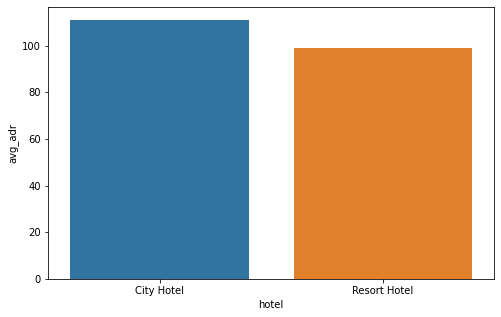

In [ ]:
# which hotel to make more revenue?
data_rev = grouped_by_hotel['adr'].agg(np.mean).reset_index().rename(columns = {'adr':'avg_adr'})  
plt.figure(figsize = (8,5))
sns.barplot(x = data_rev['hotel'], y = data_rev['avg_adr'] )
plt.show()

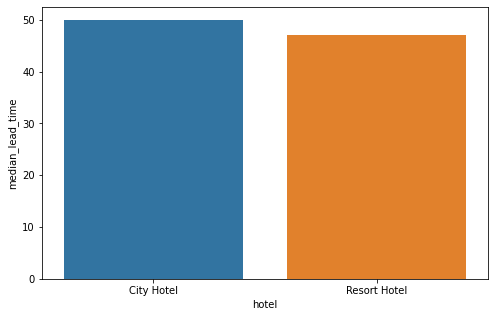

In [ ]:
# which Hotel has higher lead time?
data_lead = grouped_by_hotel['lead_time'].median().reset_index().rename(columns = {'lead_time':'median_lead_time'})
plt.figure(figsize = (8,5))
sns.barplot(x =data_lead['hotel'], y = data_lead['median_lead_time'] )
plt.show()

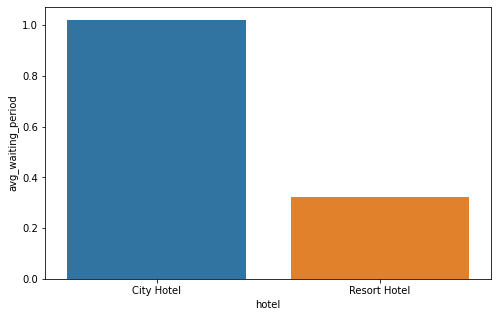

In [ ]:
# which hotel has longer waiting time?
data_wait = pd.DataFrame(grouped_by_hotel['days_in_waiting_list'].agg(np.mean).reset_index().rename(columns = {'days_in_waiting_list':'avg_waiting_period'}))
plt.figure(figsize = (8,5))
sns.barplot(x = data_wait['hotel'], y = data_wait['avg_waiting_period'] )
plt.show()

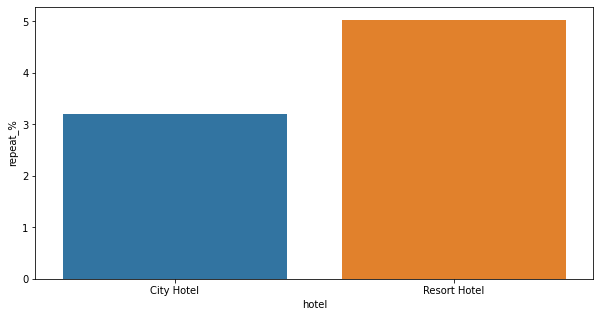

In [ ]:
# which hotel has more number of repeated guest?


# Selecting and counting repeated customers bookings
repeated_data = hotel_df[hotel_df['is_repeated_guest'] == 1]
repeat_grp = repeated_data.groupby('hotel')
data1 = pd.DataFrame(repeat_grp.size()).rename(columns = {0:'total_repeated_guests'})

# Counting total bookings
total_booking = grouped_by_hotel.size()
data2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
data3  = pd.concat([data1,data2], axis = 1)

# Calculating repeat %
data3['repeat_%'] = round((data3['total_repeated_guests']/data3['total_bookings'])*100,2)

plt.figure(figsize = (10,5))
sns.barplot(x =data3.index, y =data3['repeat_%'])
plt.show()

##  Booking across different Year, Months & Days

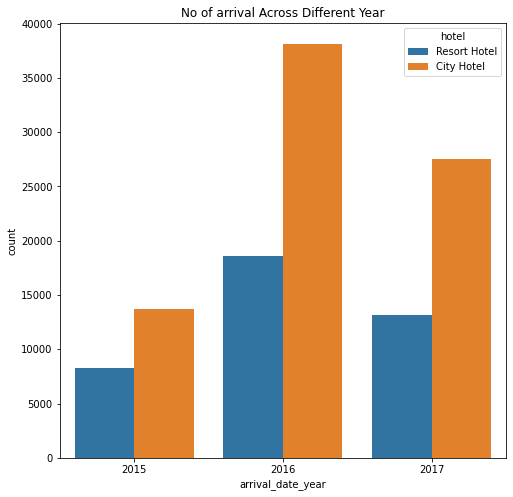

In [ ]:
# No of arrival across Different Year
list2 = ['hotel', 'arrival_date_year', 'arrival_date_month','arrival_date_day_of_month' ]
period_arrival = hotel_df[list2]
sns.countplot(data = period_arrival, x = 'arrival_date_year', hue = 'hotel').set_title('No of arrival Across Different Year')
plt.show()

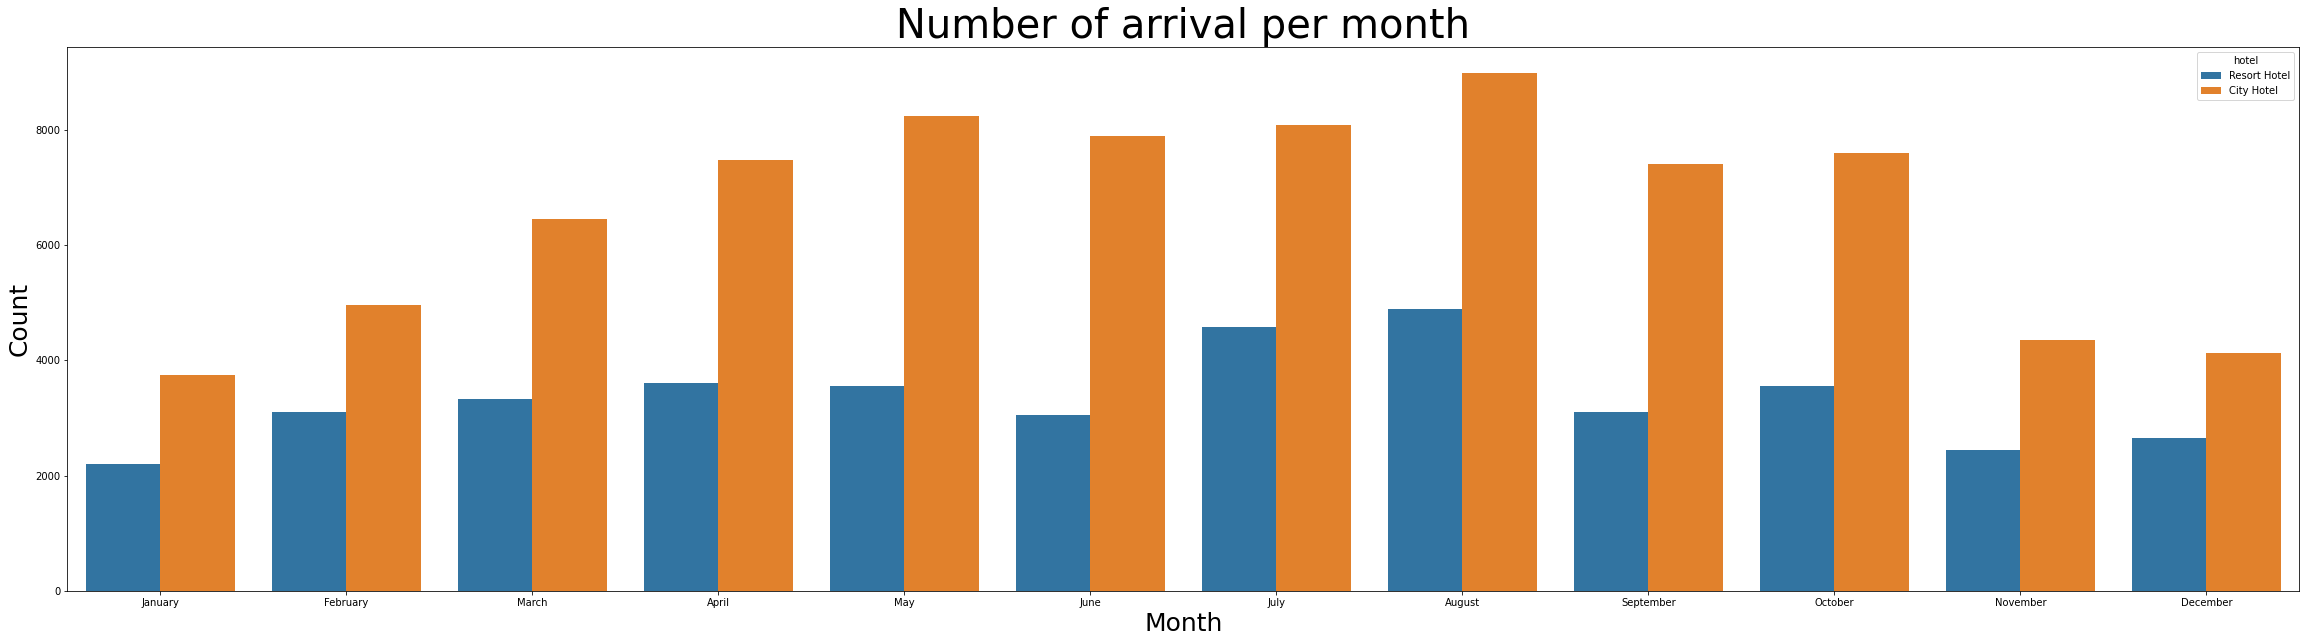

In [ ]:
# No of arrival Month wise
plt.figure(figsize=(40,10))

sns.countplot(data = period_arrival, x = 'arrival_date_month', hue = 'hotel', order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']).set_title('Number of arrival per month',fontsize=40)
plt.xlabel('Month',fontsize=25)
plt.ylabel('Count',fontsize=25)
plt.show()

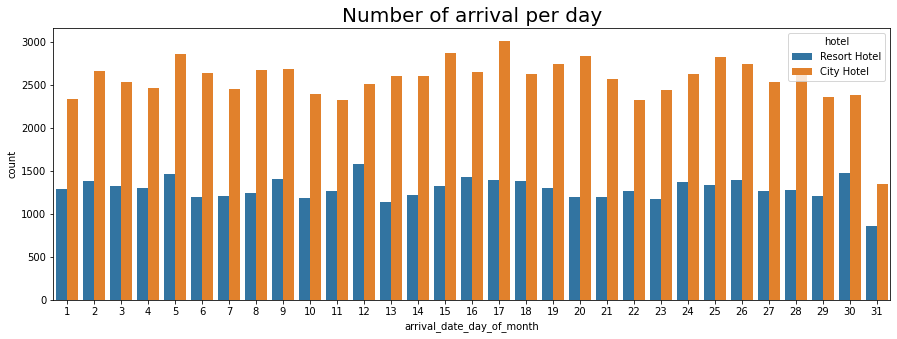

In [ ]:
## No of arrival Day wise
plt.figure(figsize=(15,5))

sns.countplot(data = period_arrival, x = 'arrival_date_day_of_month', hue = 'hotel').set_title('Number of arrival per day', fontsize =20) 
plt.show()

#Night Stay Duration

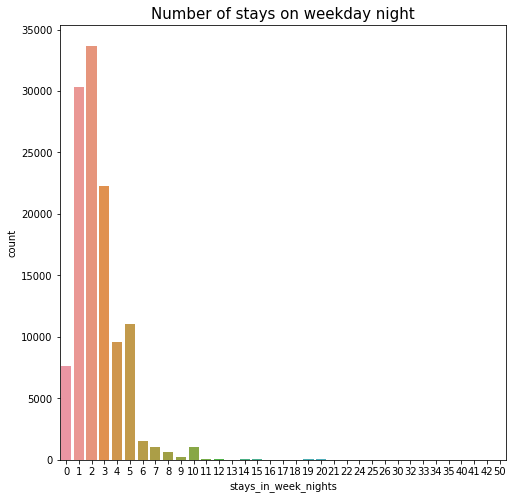

In [ ]:
sns.countplot(data = hotel_df, x = 'stays_in_week_nights' ).set_title('Number of stays on weekday night' , fontsize = 15)
plt.show()

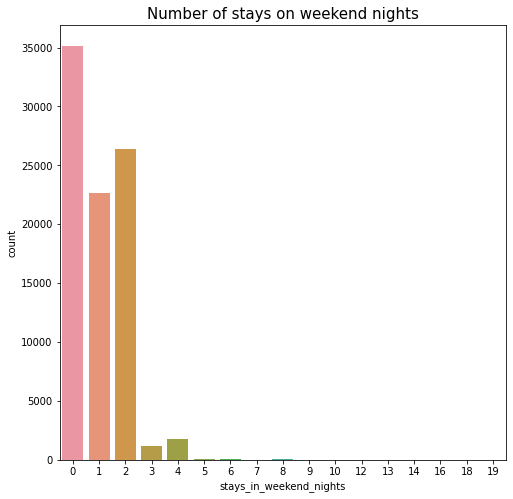

In [ ]:
sns.countplot(data =hotel_df, x = 'stays_in_weekend_nights').set_title('Number of stays on weekend nights', fontsize = 15)
plt.show()

# Type of Visitor
##Adults, childrens and Babies 

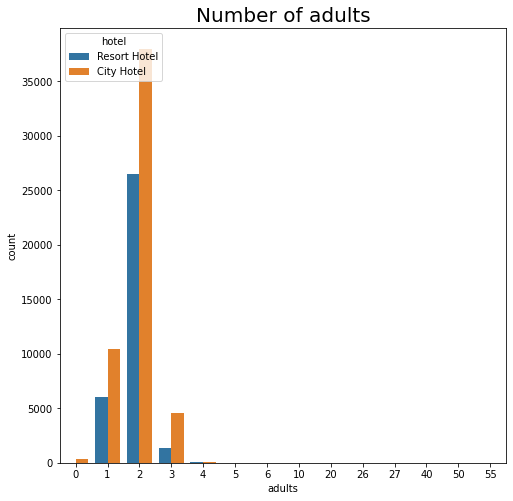

In [ ]:
# No of Adults visitors
sns.countplot(data = hotel_df, x = 'adults', hue = 'hotel').set_title("Number of adults", fontsize = 20)
plt.show()

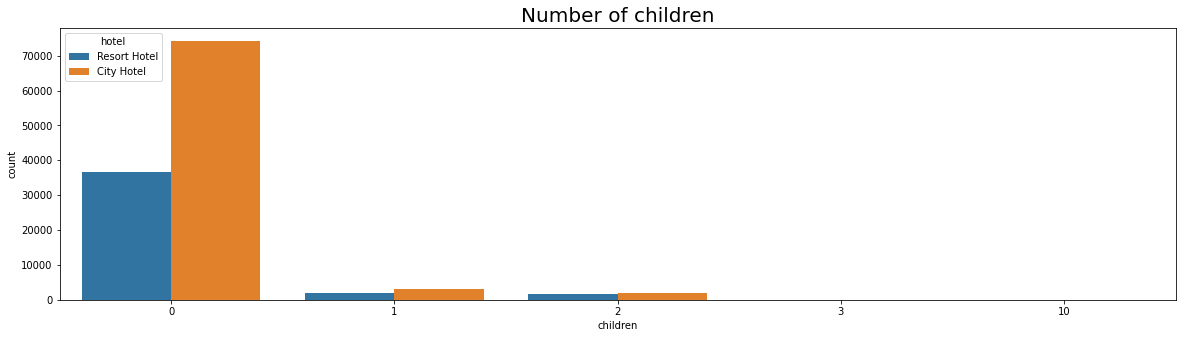

In [ ]:
# No of Childrens visitors
plt.figure(figsize=(20,5))
sns.countplot(data = hotel_df, x = 'children', hue = 'hotel').set_title("Number of children", fontsize = 20)
plt.show()

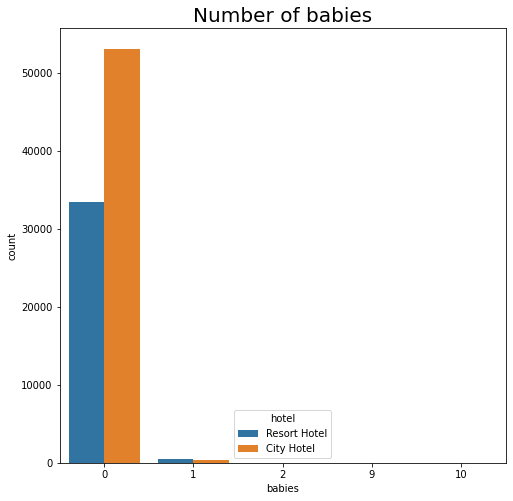

In [ ]:
# No of Babies visitors
sns.countplot(data = hotel_df, x = 'babies', hue = 'hotel').set_title("Number of babies", fontsize = 20)
plt.show()

##  Market Seagment

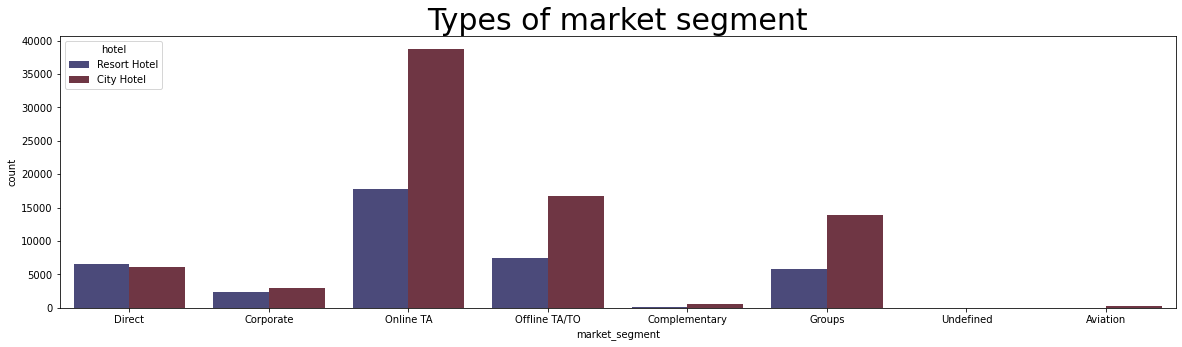

In [ ]:
# According to type of market segment no of visitors
plt.figure(figsize=(20,5))
sns.countplot(data=hotel_df, x = 'market_segment', hue= 'hotel', palette="icefire").set_title('Types of market segment', fontsize = 30)
plt.show()

# Distributiion Channel by Analysis

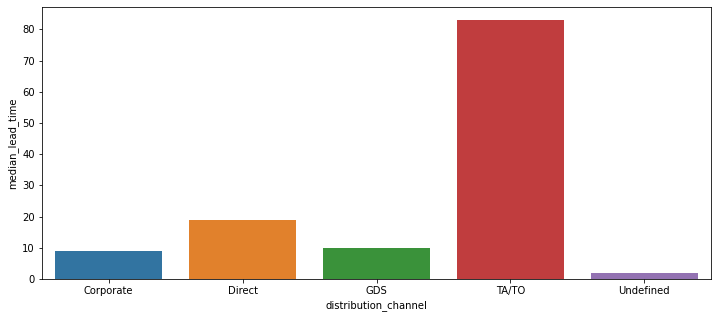

In [ ]:
# which channel is mostly used early booking of hotel 
group_by_dc =hotel_df.groupby('distribution_channel')
data_DC = pd.DataFrame(round(group_by_dc['lead_time'].median(),2)).reset_index().rename(columns = {'lead_time': 'median_lead_time'})
plt.figure(figsize = (12,5))
sns.barplot(x =data_DC['distribution_channel'], y = data_DC['median_lead_time'])
plt.show()

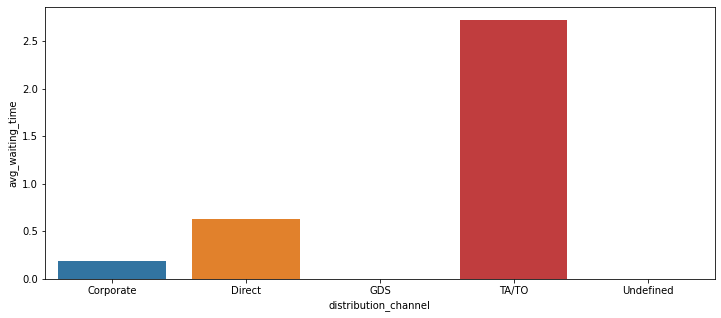

In [ ]:
data_dc_wait = pd.DataFrame(round((group_by_dc['days_in_waiting_list']).mean(),2)).reset_index().rename(columns = {'days_in_waiting_list': 'avg_waiting_time'})
plt.figure(figsize = (12,5))
sns.barplot(x = data_dc_wait['distribution_channel'], y = data_dc_wait['avg_waiting_time'])
plt.show()

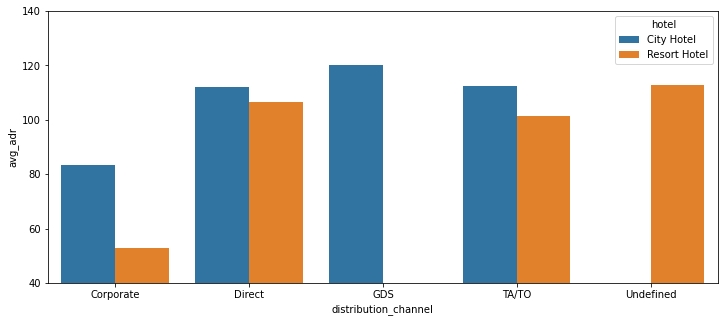

In [ ]:
group_by_dc_hotel = hotel_df.groupby(['distribution_channel', 'hotel'])
data_dc_adr= pd.DataFrame(round((group_by_dc_hotel['adr']).agg(np.mean),2)).reset_index().rename(columns = {'adr': 'avg_adr'})
plt.figure(figsize = (12,5))
sns.barplot(x = data_dc_adr['distribution_channel'], y = data_dc_adr['avg_adr'], hue = data_dc_adr['hotel'])
plt.ylim(40,140)
plt.show()

## Deposit Policies of Hotel 

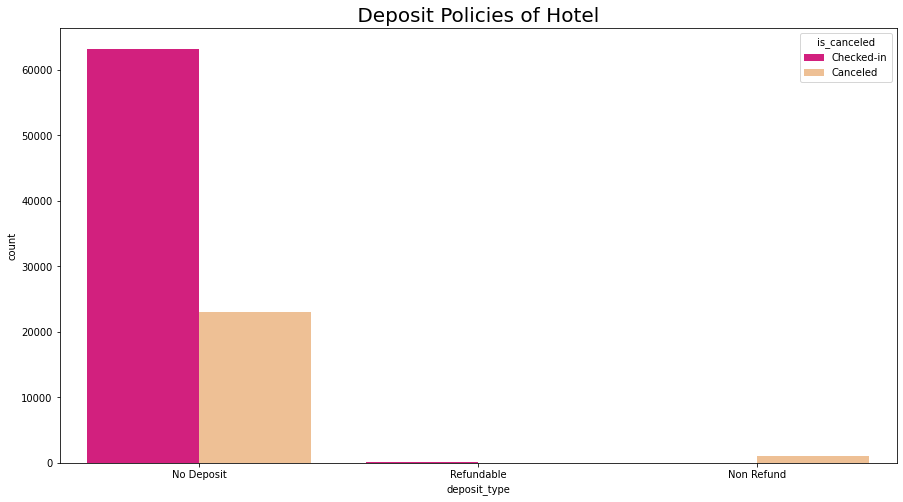

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data=hotel_df, x = 'deposit_type', hue= 'is_canceled', palette="Accent_r").set_title(' Deposit Policies of Hotel ', fontsize = 20)
plt.show()

## Percentage of meal preference

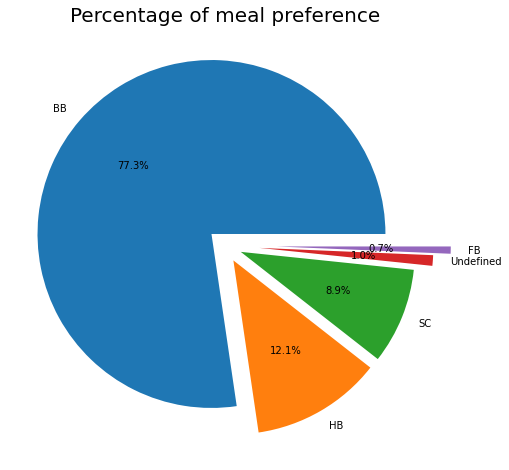

In [ ]:
# Indexing labels. tolist() will convert the index to list for easy manipulation
plt.rcParams['figure.figsize'] = 8,8 # Enlarging the pie chart
g = hotel_df['meal'].value_counts().index.tolist()

# Convert value counts to list
sizes = hotel_df['meal'].value_counts().tolist()
plt.title("Percentage of meal preference",fontsize=20)
plt.pie(sizes, labels=g, explode=[0.1,0.1,0.1,0.2,0.3], autopct='%1.1f%%')
plt.show()


#Overview of Guest


### overview of repeated guest

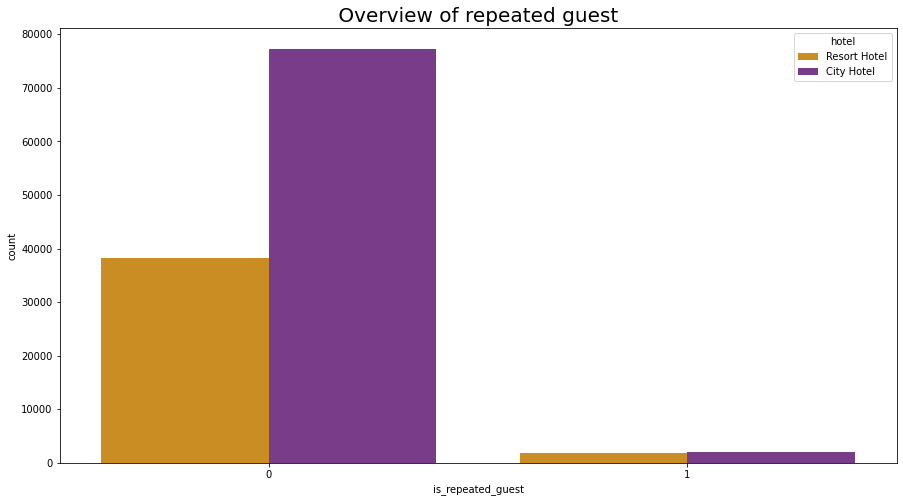

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data=hotel_df, x = 'is_repeated_guest', hue= 'hotel', palette="CMRmap_r").set_title(' Overview of repeated guest ', fontsize = 20)
plt.show()

## Heatmap Correlation



In [ ]:
hotel_df['total_stay'] = hotel_df['stays_in_weekend_nights']+hotel_df['stays_in_week_nights']
hotel_df['total_people'] = hotel_df['adults']+hotel_df['children']+hotel_df['babies']
num_df =hotel_df[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_stay','total_people']]


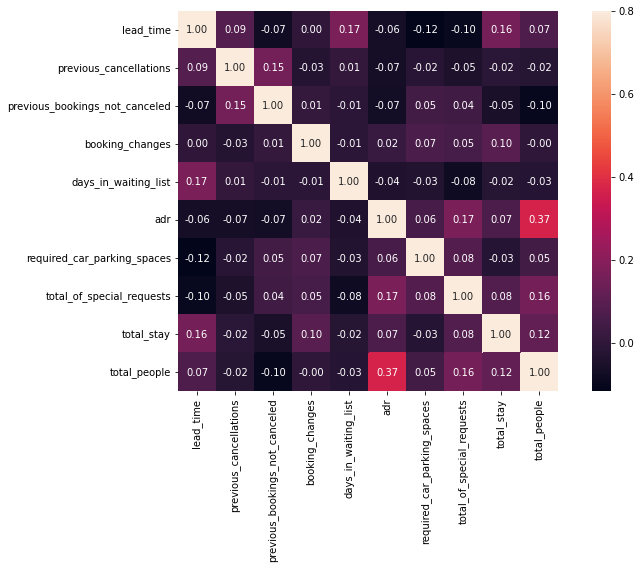

In [ ]:
#correlation matrix
corrmat = num_df.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True);

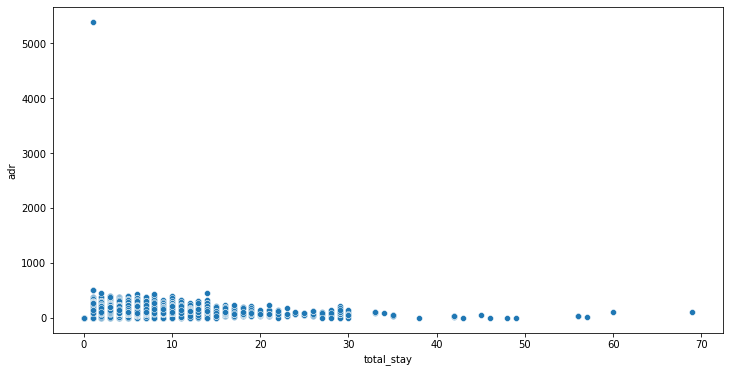

In [ ]:
# Lets see does length of stay affects the adr

plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = hotel_df)
plt.show()

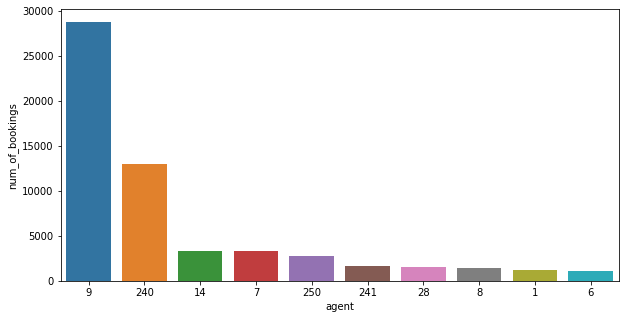

In [ ]:
# Q1) Which agent makes most no. of bookings?

data_b = pd.DataFrame(hotel_df['agent'].value_counts()).reset_index().rename(columns = {'index':'agent','agent':'num_of_bookings'}).sort_values(by = 'num_of_bookings', ascending = False)
data_b.drop(data_b[data_b['agent'] == 0].index, inplace = True)            # 0 represents that booking is not made by an agent
data_b = data_b[:10]                                                   # Selecting top 10 performing agents
plt.figure(figsize = (10,5))
sns.barplot(x = 'agent', y = 'num_of_bookings', data = data_b, order = data_b.sort_values('num_of_bookings', ascending = False).agent)
plt.show()


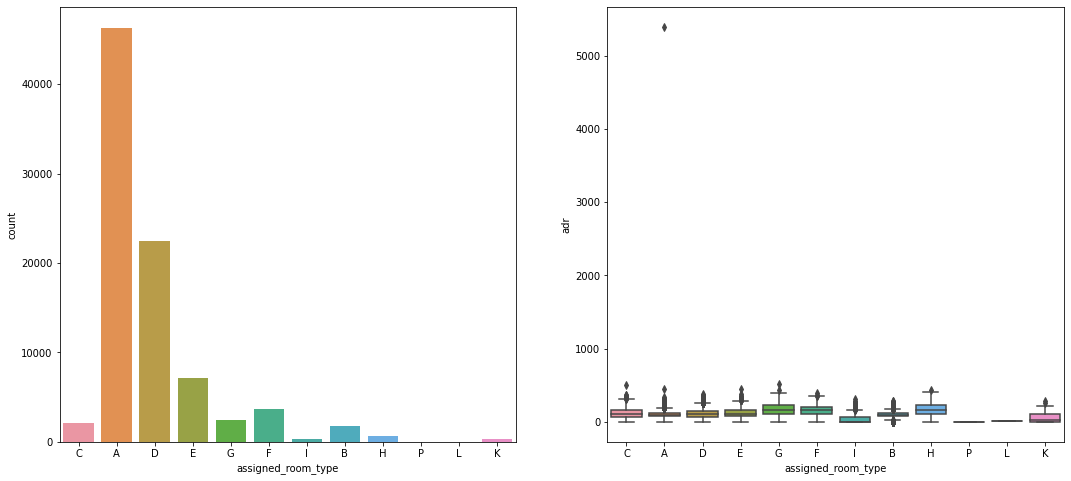

In [ ]:
# Q2) Which room type is in most demand and which room type generatest highest adr?
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

grp_by_room = hotel_df.groupby('assigned_room_type')
data_b['Num_of_bookings'] = grp_by_room.size()

sns.countplot(ax = axes[0], x =hotel_df['assigned_room_type'])
sns.boxplot(ax = axes[1], x = hotel_df['assigned_room_type'], y = hotel_df['adr'])
plt.show()

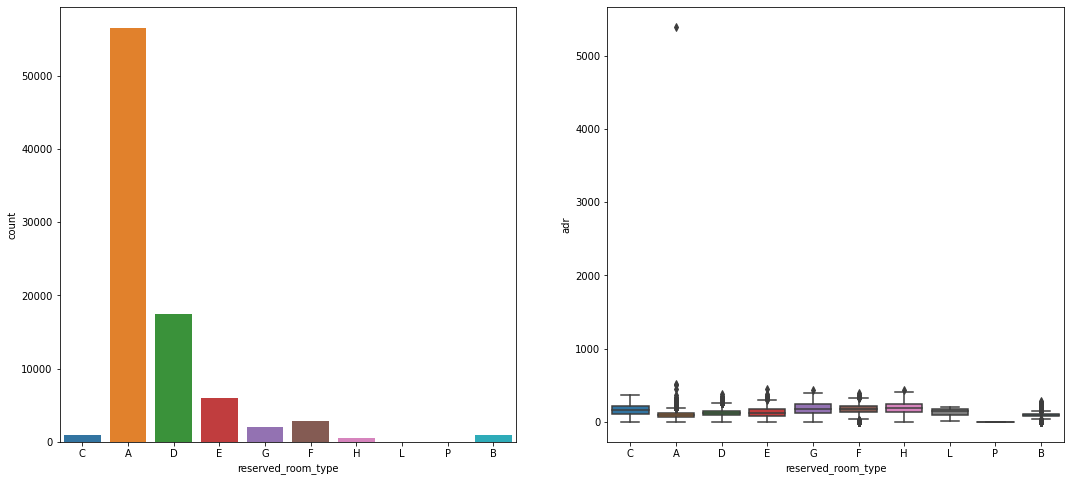

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

grp_by_room = hotel_df.groupby('reserved_room_type')
data_b['Num_of_bookings'] = grp_by_room.size()

sns.countplot(ax = axes[0], x =hotel_df['reserved_room_type'])
sns.boxplot(ax = axes[1], x = hotel_df['reserved_room_type'], y = hotel_df['adr'])
plt.show()

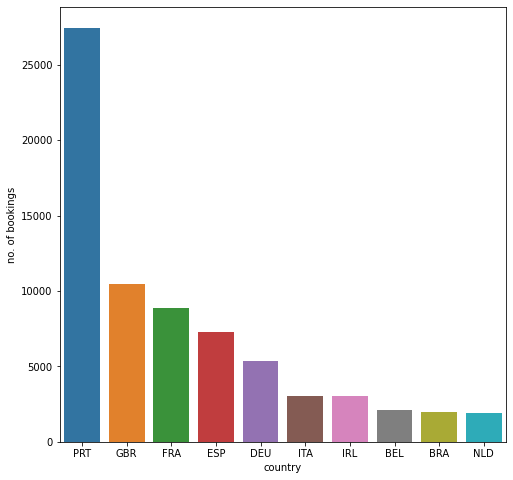

In [ ]:
#(3) which countries most of the customers visit these hotels?
grp_by_country = hotel_df.groupby('country')
d2 = pd.DataFrame(grp_by_country.size()).rename(columns = {0:'no. of bookings'}).sort_values('no. of bookings', ascending = False)
d2 = d2[:10]
sns.barplot(x = d2.index, y = d2['no. of bookings'])
plt.show()

# Conclusions


*   Majority of the hotels booked are city hotel. Definitely need to spend the most targeting fund on those hotel.
*   We also realise that the high rate of cancellations can be due high no deposit policies.
*   We should also target months between May to Aug. Those are peak months due to the summer period.
*   Majority of the guests are from Western Europe. We should spend a significant amount of our budget on those area.
*   Given that we do not have repeated guests, we should target our advertisement on guests to increase returning guests.


